In [7]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [28]:
df = pd.read_csv("TestReviews.csv")

In [29]:
df.head(2)

,review_text,class
0,Fantastic spot for an even or a quite cocktail...,1
1,"Love, love, love the calamari. It's so good an...",1


In [30]:
# Data Cleaning
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    tokens = [t for t in tokens if t not in stopwords.words('english')]  # Remove stop words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatization
    return ' '.join(tokens)

df['cleaned_text'] = df['review_text'].apply(preprocess_text)

In [31]:
df.head()

,review_text,class,cleaned_text
0,Fantastic spot for an even or a quite cocktail...,1,fantastic spot even quite cocktail swell host ...
1,"Love, love, love the calamari. It's so good an...",1,love love love calamari good spicy endless lis...
2,"Love this place. Stiff martinis and cocktails,...",1,love place stiff martini cocktail cheap drink ...
3,It's everything a great cocktail bar should be...,1,everything great cocktail bar great location a...
4,"I came here before a pirates game, so it was a...",1,came pirate game around ish evening gotten luc...


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['class'].values

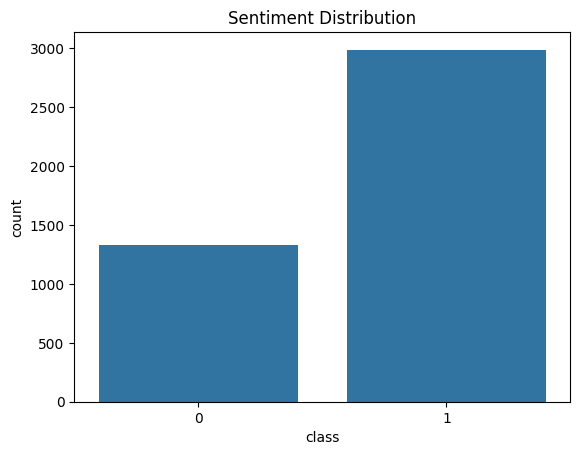

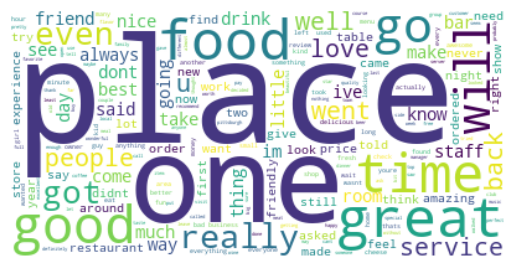

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(x='class', data=df)
plt.title("Sentiment Distribution")
plt.show()

# Word frequency in positive and negative reviews
positive_words = ' '.join(df[df['class'] == '1']['cleaned_text'])
negative_words = ' '.join(df[df['class'] == '0']['cleaned_text'])

from wordcloud import WordCloud
# Word Cloud for Skills
wordcloud = WordCloud(background_color='white').generate(' '.join(df['cleaned_text'].fillna('')))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9387283236994219


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Random Forest Accuracy: 0.9202312138728324


In [37]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")

SVM Accuracy: 0.9502890173410404


In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(kernel='linear'), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Best parameters
print(grid.best_params_)

# Re-train using the best parameters
best_svm = grid.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)
print(f"Tuned SVM Accuracy: {accuracy_score(y_test, y_pred_best_svm)}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=   2.3s
[CV] END .....................................C=0.1, gamma=1; total time=   2.3s
[CV] END .....................................C=0.1, gamma=1; total time=   2.4s
[CV] END .....................................C=0.1, gamma=1; total time=   2.2s
[CV] END .....................................C=0.1, gamma=1; total time=   2.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.3s
[CV] END ..................................C=0.1, gamma=0.01; total time=   2.2s
[CV] END ..................................C=0.1,

In [49]:
# Predict on new data
new_review = ["This product has a fault"]
new_review_processed = preprocess_text(new_review[0])
new_review_tfidf = tfidf_vectorizer.transform([new_review_processed]).toarray()
sentiment = svm.predict(new_review_tfidf)

print('Sentiment:', 'Positive' if sentiment[0] == 1 else 'Negative')

Sentiment: Positive


In [53]:
# Predict on new data
new_review = ["This product is bad"]
new_review_processed = preprocess_text(new_review[0])
new_review_tfidf = tfidf_vectorizer.transform([new_review_processed]).toarray()
sentiment = best_svm.predict(new_review_tfidf)

print('Sentiment:', 'Positive' if sentiment[0] == 1 else 'Negative')

Sentiment: Negative
